In [0]:
# author: Asmaa ~ 2019
# ----------------------

# import libraries
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# Data Prepaeration

### Downloading Data

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-08-15 07:43:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  66.6MB/s    in 2.1s    

2019-08-15 07:43:09 (66.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2019-08-15 07:43:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]

In [0]:
# extracting zip files
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# setting image directories to variables
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# Pre-processing

In [0]:
# setting scaling and augmentation parameters for trainig set
train_datagenerator = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


In [0]:
# rescaling test set
val_datagenerator = ImageDataGenerator(rescale=1/255)

In [8]:
# flow tarining images from directory and resize images to 300x300 and set classification mode
train_generator = train_datagenerator.flow_from_directory(
        '/tmp/horse-or-human/', target_size=(300, 300), batch_size=128, class_mode='binary')

validation_generator = val_datagenerator.flow_from_directory(
        '/tmp/validation-horse-or-human/',  target_size=(300, 300), batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Building the Model

### Setting the structure

In [0]:
# initialize the model
model = Sequential()

# add first convolution 
# images are 300x300px with 3 color channels
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2,2))

# add second convolution
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# add third convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# add fourth convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# add fifth convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# flatten last output and feed it to DNN
model.add(Flatten())

# add a hidden layer
model.add(Dense(512, activation='relu'))

# add output layer, it is a binary classification problem 
model.add(Dense(1, activation='sigmoid'))

### Compiling the Model

In [10]:
# compile the model after setting functional properties
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

W0815 07:43:32.834729 140181656041344 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
fitting = model.fit_generator( train_generator, steps_per_epoch=8, epochs=100, verbose=1,
      validation_data = validation_generator, validation_steps=8)

Epoch 1/100
8/8 [==============================] - 30s 4s/step - loss: 0.6983 - acc: 0.5150 - val_loss: 0.6766 - val_acc: 0.5000
Epoch 2/100
8/8 [==============================] - 30s 4s/step - loss: 0.6800 - acc: 0.5506 - val_loss: 0.6836 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 34s 4s/step - loss: 0.6688 - acc: 0.5996 - val_loss: 0.6436 - val_acc: 0.5977
Epoch 4/100
8/8 [==============================] - 30s 4s/step - loss: 0.6577 - acc: 0.6274 - val_loss: 0.6103 - val_acc: 0.7148
Epoch 5/100
8/8 [==============================] - 30s 4s/step - loss: 0.6360 - acc: 0.6674 - val_loss: 0.5950 - val_acc: 0.6914
Epoch 6/100
8/8 [==============================] - 30s 4s/step - loss: 0.6336 - acc: 0.7186 - val_loss: 0.5721 - val_acc: 0.6992
Epoch 7/100
8/8 [==============================] - 30s 4s/step - loss: 0.6215 - acc: 0.7075 - val_loss: 0.6111 - val_acc: 0.5781
Epoch 8/100
8/8 [==============================] - 30s 4s/step - loss: 0.6501 - acc: 0.6785 - val

# Metrics Visualization

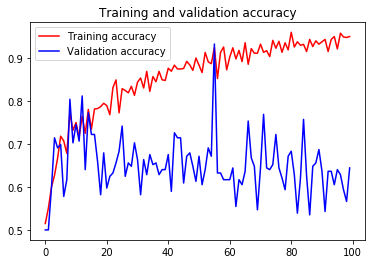

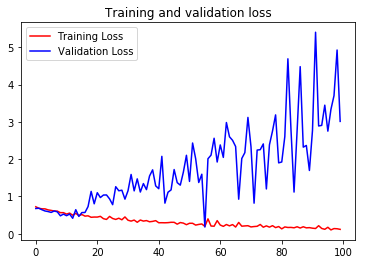

In [14]:
# get metrics from the model
acc = fitting.history['acc']
val_acc = fitting.history['val_acc']
loss = fitting.history['loss']
val_loss = fitting.history['val_loss']

epochs = range(len(acc))

# plot accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()